In [6]:
import numpy as np
import pandas as pd

In [7]:
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',200)

np.set_printoptions(threshold=np.inf)

In [8]:
#data_df=pd.read_csv('./inputs/data_v1.csv', index_col=0)
#data_df=pd.read_csv('./inputs/data_v1.csv', index_col=0)
data_df=pd.read_csv('./inputs/data_v3_2.csv', index_col=0)

In [9]:
#data_df=data_df.iloc[0:1000]

In [10]:
data_df.head()

,YieldScopePriority_X,YieldScopePriority_Y,IsYieldForEnabled,IsYieldedEnabled,TokenAllocation,QuotaTokens,TotalWaitingTimeInMins,EstimatedRemainingRunningTimeInMins,IsQuotaFullyLoad,WhetherHasSLA,Priority
0,1.0,0.0,1,1,190,10687,0.950718,360,0,0,70
1,NaN,NaN,1,1,4000,14572,165.389673,360,1,1,137
2,NaN,NaN,1,1,400,2150,86.818160,360,0,0,130
3,2.0,0.0,1,1,50,29125,0.675911,360,0,1,81
4,1.0,0.0,1,1,190,10687,52.082043,360,1,0,94


In [11]:
data_df = data_df[
    ['YieldScopePriority_X', 'YieldScopePriority_Y', 'IsYieldForEnabled', 'IsYieldedEnabled', 'TokenAllocation',
     'QuotaTokens', 'TotalWaitingTimeInMins', 'EstimatedRemainingRunningTimeInMins', 'IsQuotaFullyLoad',
     'WhetherHasSLA', 'Priority']]
data_df.head()

,YieldScopePriority_X,YieldScopePriority_Y,IsYieldForEnabled,IsYieldedEnabled,TokenAllocation,QuotaTokens,TotalWaitingTimeInMins,EstimatedRemainingRunningTimeInMins,IsQuotaFullyLoad,WhetherHasSLA,Priority
0,1.0,0.0,1,1,190,10687,0.950718,360,0,0,70
1,NaN,NaN,1,1,4000,14572,165.389673,360,1,1,137
2,NaN,NaN,1,1,400,2150,86.818160,360,0,0,130
3,2.0,0.0,1,1,50,29125,0.675911,360,0,1,81
4,1.0,0.0,1,1,190,10687,52.082043,360,1,0,94


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   YieldScopePriority_X                 574 non-null    float64
 1   YieldScopePriority_Y                 571 non-null    float64
 2   IsYieldForEnabled                    1000 non-null   int64  
 3   IsYieldedEnabled                     1000 non-null   int64  
 4   TokenAllocation                      1000 non-null   int64  
 5   QuotaTokens                          1000 non-null   int64  
 6   TotalWaitingTimeInMins               1000 non-null   float64
 7   EstimatedRemainingRunningTimeInMins  1000 non-null   int64  
 8   IsQuotaFullyLoad                     1000 non-null   int64  
 9   WhetherHasSLA                        1000 non-null   int64  
 10  Priority                             1000 non-null   int64  
dtypes: float64(3), int64(8)
memory 

<AxesSubplot:>

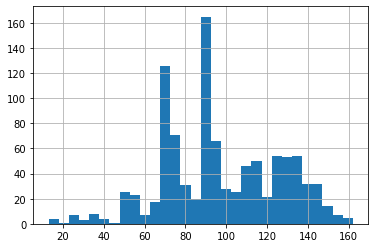

In [13]:
data_df['Priority'].hist(bins=30)

In [14]:
#data_df=data_df.iloc[:,0:10]
data_df.head()

,YieldScopePriority_X,YieldScopePriority_Y,IsYieldForEnabled,IsYieldedEnabled,TokenAllocation,QuotaTokens,TotalWaitingTimeInMins,EstimatedRemainingRunningTimeInMins,IsQuotaFullyLoad,WhetherHasSLA,Priority
0,1.0,0.0,1,1,190,10687,0.950718,360,0,0,70
1,NaN,NaN,1,1,4000,14572,165.389673,360,1,1,137
2,NaN,NaN,1,1,400,2150,86.818160,360,0,0,130
3,2.0,0.0,1,1,50,29125,0.675911,360,0,1,81
4,1.0,0.0,1,1,190,10687,52.082043,360,1,0,94


In [15]:
data_df['YieldScopePriority_X'] = data_df['YieldScopePriority_X'].astype(str)
data_df['YieldScopePriority_Y'] = data_df['YieldScopePriority_Y'].astype(str)

In [16]:
data_df['YieldScopePriority_X'].value_counts()

1.0    530
nan    426
2.0     38
0.0      6
Name: YieldScopePriority_X, dtype: int64

#### priority_x, priority_y 目前只有5个值，0,1,2,10，null

In [17]:
data_df['YieldScopePriority_Y'].value_counts()

0.0     553
nan     429
1.0      12
10.0      6
Name: YieldScopePriority_Y, dtype: int64

In [18]:
row =  data_df.index[(data_df['YieldScopePriority_X'] != 'nan')&(data_df['YieldScopePriority_X'] != '0.0')&(data_df['YieldScopePriority_X'] != '1.0')]
data_df.loc[row,'YieldScopePriority_X']='2.0'
data_df['YieldScopePriority_X'].value_counts()

1.0    530
nan    426
2.0     38
0.0      6
Name: YieldScopePriority_X, dtype: int64

In [19]:
row2 =  data_df.index[(data_df['YieldScopePriority_Y'] != 'nan')&(data_df['YieldScopePriority_Y'] != '0.0')&(data_df['YieldScopePriority_Y'] != '1.0')]
data_df.loc[row2,'YieldScopePriority_Y']='2.0'
data_df['YieldScopePriority_Y'].value_counts()

0.0    553
nan    429
1.0     12
2.0      6
Name: YieldScopePriority_Y, dtype: int64

#### 把 YieldScopePriority_X	YieldScopePriority_Y 用one hot来处理

In [21]:
data_dummy_df = pd.get_dummies(data_df)
data_dummy_df.head()

,IsYieldForEnabled,IsYieldedEnabled,TokenAllocation,QuotaTokens,TotalWaitingTimeInMins,EstimatedRemainingRunningTimeInMins,IsQuotaFullyLoad,WhetherHasSLA,Priority,YieldScopePriority_X_0.0,YieldScopePriority_X_1.0,YieldScopePriority_X_2.0,YieldScopePriority_X_nan,YieldScopePriority_Y_0.0,YieldScopePriority_Y_1.0,YieldScopePriority_Y_2.0,YieldScopePriority_Y_nan
0,1,1,190,10687,0.950718,360,0,0,70,0,1,0,0,1,0,0,0
1,1,1,4000,14572,165.389673,360,1,1,137,0,0,0,1,0,0,0,1
2,1,1,400,2150,86.818160,360,0,0,130,0,0,0,1,0,0,0,1
3,1,1,50,29125,0.675911,360,0,1,81,0,0,1,0,1,0,0,0
4,1,1,190,10687,52.082043,360,1,0,94,0,1,0,0,1,0,0,0


#### 划分训练集和测试集
##### 随机采样 700训练，300用于测试

In [22]:
train_df,test_df = np.split(data_dummy_df.sample(frac=1), [int(.7*len(data_df))])

In [23]:
train_priority = train_df.pop('Priority')
test_priority = test_df.pop('Priority')

In [24]:
train_df.shape, test_df.shape
X_train = train_df.values
X_test = test_df.values

#### 建模

In [33]:
from sklearn import linear_model
import sklearn.linear_model
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#### linear regression

In [34]:
clf1=linear_model.LinearRegression()
test_score = np.sqrt(-cross_val_score(clf1, X_train, train_priority, cv=10, scoring='neg_mean_squared_error'))
SqrtMSE = np.mean(test_score)
SqrtMSE,np.mean(train_priority)

(4.363084817801768, 97.41)

#### 添加norm-1作为正则项

In [38]:
alphas = np.logspace(-3, 2, 30)
# 1e-3到1e2之间有50个数
test_scores = []
for alpha in alphas:
    clf2 = linear_model.Lasso(alpha)
    #均方根
    test_score = np.sqrt(-cross_val_score(clf2, X_train, train_priority, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

C:\Users\t-quanyutao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4713.19750025004, tolerance: 46.939193571428575
  model = cd_fast.enet_coordinate_descent(
C:\Users\t-quanyutao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.2687202811439, tolerance: 48.13506
  model = cd_fast.enet_coordinate_descent(
C:\Users\t-quanyutao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1211.609185220087, tolerance: 45.66979839285714
  model = cd_fast.enet_coordinate_descent(
C:\Users\t-quanyutao\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Co

Text(0, 0.5, 'MSE')

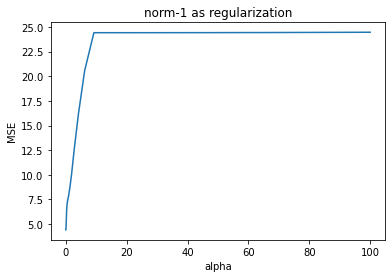

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("norm-1 as regularization");
plt.xlabel("alpha")
plt.ylabel("MSE")

#### 添加norm-2作为正则项

In [ ]:
alphas = np.logspace(-3, 2, 50)
# 1e-3到1e2之间有50个数
test_scores = []
for alpha in alphas:
    clf3 = linear_model.Ridge(alpha)
    #clf是ridge类型
    test_score = np.sqrt(-cross_val_score(clf3, X_train, train_priority, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores)
plt.title("norm-2 as regularization");
plt.xlabel("alpha")
plt.ylabel("MSE")

#### random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor

#### 对n_estimators进行调优

In [41]:
n_estimators = range(1,401,20)
test_scores = []
for n_estimator in n_estimators:
    clf = RandomForestRegressor(n_estimators=n_estimator, max_features=.3, random_state=10)
    test_score = np.sqrt(-cross_val_score(clf, X_train, train_priority, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

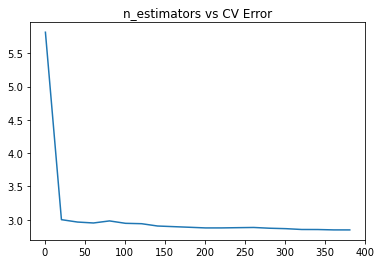

In [42]:
plt.plot(n_estimators, test_scores)
plt.title("n_estimators vs CV Error");

#### max_features进行调优

In [43]:
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=225, max_features=max_feat, random_state=15)
    test_score = np.sqrt(-cross_val_score(clf, X_train, train_priority, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

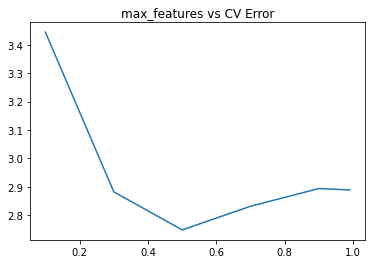

In [44]:
plt.plot(max_features, test_scores)
plt.title("max_features vs CV Error");

## max_features=0.7,  n_estimators=225 的RF, 泛化误差

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
rf = RandomForestRegressor(n_estimators=225, max_features=0.5, random_state=15)
rf.fit(X_train, train_priority)

pre=rf.predict(X_test)
np.sqrt(mean_squared_error(pre,test_priority)), np.mean(test_priority)

(2.6106289904257896, 97.26)

In [48]:
# MAE
mean_absolute_error(pre,test_priority), np.mean(test_priority)

(1.6033925925925925, 97.26)

In [49]:
# R_square
r2_score(test_priority,pre)

0.9911662032578458

In [50]:
import matplotlib.pyplot as plt

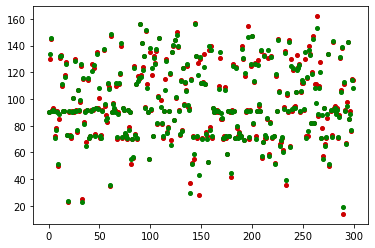

In [51]:
xlabel = range(300)
plt.plot(xlabel,test_priority,'o',label='true value',markersize=4.,color=(0.8,0.,0.))
plt.plot(xlabel,pre,'o',label='prediction',markersize=4.,color=(0,0.5,0.))

In [52]:
test_priority_sort = test_priority.reset_index()
test_priority_sort = test_priority_sort.sort_values(by = 'Priority')

In [53]:
pre_sort = pd.Series(pre.tolist())

In [54]:
test_priority_sort.index
pre_sort = pre_sort[test_priority_sort.index]

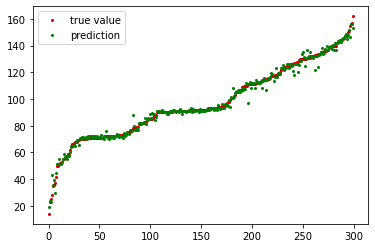

In [55]:
plt.cla()
xlabel = range(300)
plt.plot(xlabel,test_priority_sort['Priority'],'o',label='true value',markersize=2.,color=(0.8,0,0.))
plt.plot(xlabel,pre_sort,'o',label='prediction',markersize=2.,color=(0,0.5,0.))
plt.legend()

In [ ]:
rf.feature_importances_

In [ ]:
train_df.describe()

### 导入新的样本数据, 对比当前ares scheduler和模型的排序的结果(测试用)

In [ ]:
compare_df=pd.read_csv('./inputs/compare_data.csv', index_col=0)
compare_df=compare_df.sort_values(by = 'Priority')

In [ ]:
compare_df=compare_df.rename(columns={'isOverLoaded':'IsQuotaFullyLoad'})
compare_df=compare_df[['YieldScopePriority_X','YieldScopePriority_Y','IsYieldForEnabled','IsYieldedEnabled','TokenAllocation','QuotaTokens','TotalWaitingTimeInMins','IsQuotaFullyLoad','SLA','Priority']]
compare_df=compare_df.reset_index(drop=True)
compare_df.head()

In [ ]:
compare_df=compare_df.rename(columns={'isOverLoaded':'IsQuotaFullyLoad'})
compare_df['SLA'] = compare_df['SLA'].isnull()
compare_df.head()

In [ ]:
original_df=compare_df.copy(deep=True)

In [ ]:
original_result=original_df

In [ ]:
compare_priority = compare_df.pop('Priority')

In [ ]:
compare_df['SLA'] = compare_df['SLA'].astype(int)
compare_df['YieldScopePriority_X'] = compare_df['YieldScopePriority_X'].astype(str)
compare_df['YieldScopePriority_Y'] = compare_df['YieldScopePriority_Y'].astype(str)

In [ ]:
compare_df['YieldScopePriority_X'].value_counts()

In [ ]:
compare_df['YieldScopePriority_Y'].value_counts()

In [ ]:
row =  compare_df.index[(compare_df['YieldScopePriority_X'] != 'nan')&(compare_df['YieldScopePriority_X'] != '0.0')&(compare_df['YieldScopePriority_X'] != '1.0')]
compare_df.loc[row,'YieldScopePriority_X']='2.0'
compare_df['YieldScopePriority_X'].value_counts()

In [ ]:
row =  compare_df.index[(compare_df['YieldScopePriority_Y'] != 'nan')&(compare_df['YieldScopePriority_Y'] != '0.0')&(compare_df['YieldScopePriority_Y'] != '1.0')]
compare_df.loc[row,'YieldScopePriority_Y']='2.0'
compare_df['YieldScopePriority_Y'].value_counts()

In [ ]:
compare_dummy_df = pd.get_dummies(compare_df)

In [ ]:
compare_dummy_df['YieldScopePriority_Y_1.0']=0
compare_dummy_df['YieldScopePriority_Y_2.0']=0

In [ ]:
compare_dummy_df.head()

In [ ]:
compare_dummy_df=compare_dummy_df[['IsYieldForEnabled','IsYieldedEnabled','TokenAllocation','QuotaTokens','TotalWaitingTimeInMins','IsQuotaFullyLoad','SLA','YieldScopePriority_X_0.0','YieldScopePriority_X_1.0','YieldScopePriority_X_2.0','YieldScopePriority_X_nan','YieldScopePriority_Y_0.0','YieldScopePriority_Y_1.0','YieldScopePriority_Y_2.0','YieldScopePriority_Y_nan']]

In [ ]:
compare_dummy_df

In [ ]:
pre_compare=rf.predict(compare_dummy_df)

In [ ]:
compare_df['Priority']=pre_compare

In [ ]:
compare_result=compare_df.sort_values(by = 'Priority')

In [ ]:
compare_result.index

In [ ]:
original_result.index

In [ ]:
for i in range(len(compare_result)):
    print(compare_result.index[i])

In [ ]:
plt.plot(compare_result.index)